In [51]:
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import imdb
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [52]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [53]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [54]:
x_train.shape

(25000, 10000)

In [55]:
x_test.shape

(25000, 10000)

In [56]:
y_train.shape

(25000,)

In [57]:
y_test.shape

(25000,)

In [58]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(units=16, activation='relu'))
network.add(layers.Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
x_validation, x_test, y_validation, y_test = train_test_split(x_test, y_test, test_size=15000, random_state=42)

In [61]:
x_validation.shape

(10000, 10000)

In [62]:
x_test.shape

(15000, 10000)

In [63]:
y_validation.shape

(10000,)

In [64]:
y_test.shape

(15000,)

In [65]:
history = network.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_validation, y_validation))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.5962 - loss: 0.6408 - val_accuracy: 0.8290 - val_loss: 0.5432
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8341 - loss: 0.5043 - val_accuracy: 0.8566 - val_loss: 0.4881
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8902 - loss: 0.4359 - val_accuracy: 0.8556 - val_loss: 0.4164
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9220 - loss: 0.3217 - val_accuracy: 0.8804 - val_loss: 0.3291
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9341 - loss: 0.2309 - val_accuracy: 0.8798 - val_loss: 0.3089
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9435 - loss: 0.1873 - val_accuracy: 0.8751 - val_loss: 0.3211
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9520 - loss: 0.1586 - val_accuracy: 0.8788 - val_loss: 0.3199
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9565 - loss: 0.1425 - val_accuracy: 0.8692 - v

In [66]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test_loss:', test_acc)
print('test_acc:', test_acc)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8631 - loss: 0.5253
test_loss: 0.8639333248138428
test_acc: 0.8639333248138428


In [67]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

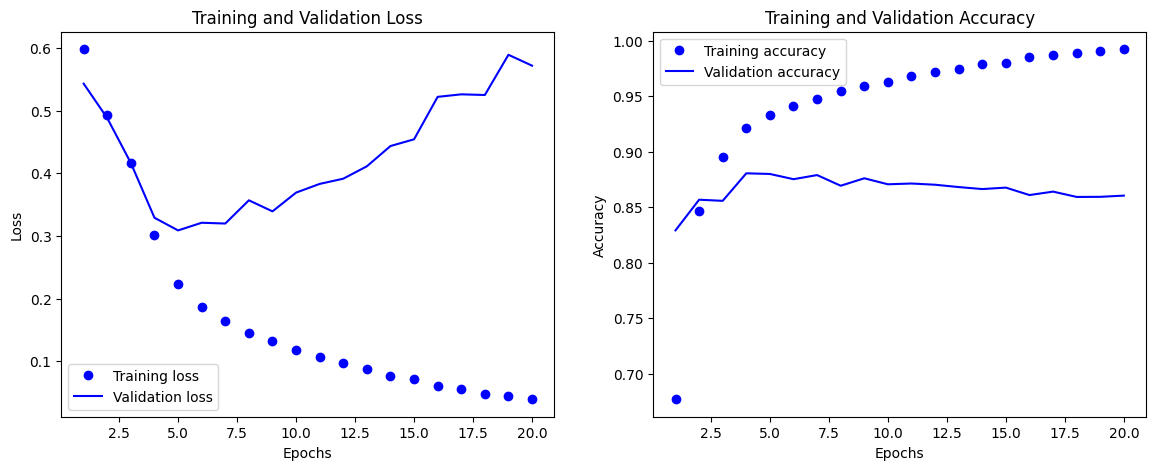

In [68]:
plt.figure(figsize=(14, 5))
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [69]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [70]:
callbacks = myCallback()

network.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9878 - loss: 0.0431
Reached 90% accuracy so cancelling training!
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9878 - loss: 0.0432


In [71]:
!pip install scikeras

In [72]:
from sklearn.model_selection import GridSearchCV
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#from scikeras.wrappers import KerasClassifier

from scikeras.wrappers import KerasClassifier


def create_model():
    network = models.Sequential()
    network.add(layers.Dense(units=16, activation='relu', input_shape=(10000,)))
    network.add(layers.Dense(units=16, activation='relu'))
    network.add(layers.Dense(units=1, activation='sigmoid'))

    network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    return network

model = KerasClassifier(build_fn=create_model)

par1_batch = [32, 64]
par2_epoch = [3, 5]

param_grid = dict(batch_size=par1_batch,
                  epochs=par2_epoch
                  )

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv = 3
                    )

grid_results = grid.fit(x_train,y_train)

print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8043 - loss: 0.4322
Epoch 2/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9279 - loss: 0.1953
Epoch 3/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9475 - loss: 0.1508
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8055 - loss: 0.4580
Epoch 2/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9255 - loss: 0.2019
Epoch 3/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9475 - loss: 0.1532
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8033 - loss: 0.4382
Epoch 2/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9285 - loss: 0.1943
Epoch 3/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9462 - loss: 0.1479
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8180 - loss: 0.4270
Epoch 2/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9303 - loss: 0.1891
Epoch 3/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9456 - loss: 0.1504
Epoch 4/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9609 - loss: 0.1177
Epoch 5/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9688 - loss: 0.0854
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8045 - loss: 0.4366
Epoch 2/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9307 - loss: 0.1888
Epoch 3/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9491 - loss: 0.1472
Epoch 4/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9591 - loss: 0.1259
Epoch 5/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9682 - loss: 0.0978
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7937 - loss: 0.4588
Epoch 2/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9289 - loss: 0.1950
Epoch 3/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9468 - loss: 0.1464
Epoch 4/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9545 - loss: 0.1287
Epoch 5/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9678 - loss: 0.0938
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7529 - loss: 0.4902
Epoch 2/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9272 - loss: 0.2025
Epoch 3/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9476 - loss: 0.1490
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7858 - loss: 0.4954
Epoch 2/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9236 - loss: 0.2145
Epoch 3/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9498 - loss: 0.1492
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7968 - loss: 0.4680
Epoch 2/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9254 - loss: 0.2001
Epoch 3/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9462 - loss: 0.1469
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7961 - loss: 0.4559
Epoch 2/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9300 - loss: 0.1942
Epoch 3/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9483 - loss: 0.1462
Epoch 4/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9610 - loss: 0.1165
Epoch 5/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9710 - loss: 0.0848
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8020 - loss: 0.4662
Epoch 2/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9268 - loss: 0.1994
Epoch 3/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9526 - loss: 0.1413
Epoch 4/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9598 - loss: 0.1163
Epoch 5/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9699 - loss: 0.0934
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7891 - loss: 0.4691
Epoch 2/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9287 - loss: 0.2039
Epoch 3/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9483 - loss: 0.1451
Epoch 4/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9600 - loss: 0.1182
Epoch 5/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9669 - loss: 0.0950
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8309 - loss: 0.3948
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9219 - loss: 0.2094
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9385 - loss: 0.1677
Best: 0.885320 using {'batch_size': 32, 'epochs': 3}


In [82]:
pip install keras-tuner --upgrade

In [83]:
import keras_tuner

In [84]:
def build_model(hp):
  network = models.Sequential()
  network.add(layers.Dense(units=hp.Int('units', min_value=16, max_value=256, step=16), activation='relu', input_shape=(10000,)))
  network.add(layers.Dense(units=hp.Int('units', min_value=16, max_value=256, step=16), activation='relu'))
  network.add(layers.Dense(units=1, activation='sigmoid'))

  network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

  return network


In [86]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

tuner.search(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_validation, y_validation))
best_model = tuner.get_best_models()[0]

Reloading Tuner from ./untitled_project/tuner0.json


In [87]:
print("Tuning Results:")

for trial in tuner.oracle.trials.values():
    print(f"Trial {trial.trial_id}:")
    print(f"    Hyperparameters: {trial.hyperparameters.values}")
    print(f"    Final loss: {trial.score}")

Tuning Results:
Trial 4:
    Hyperparameters: {'units': 224}
    Final loss: 0.2792244255542755
Trial 0:
    Hyperparameters: {'units': 256}
    Final loss: 0.27999716997146606
Trial 2:
    Hyperparameters: {'units': 96}
    Final loss: 0.2796468138694763
Trial 3:
    Hyperparameters: {'units': 48}
    Final loss: 0.3040182292461395
Trial 1:
    Hyperparameters: {'units': 192}
    Final loss: 0.2882010340690613
